In [154]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, PrecisionRecallDisplay, average_precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from itertools import cycle
from geopy.geocoders import Nominatim
from geopy.distance import geodesic
import warnings
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.utils import shuffle

In [155]:
df = pd.read_csv("Thessaloniki_data.csv")

In [156]:
warnings.filterwarnings("ignore")

In [157]:
df

,"Διεύθυνση κατοικίας (Οδός, αριθμός, TK)","Διεύθυνση εργασίας (Οδός, αριθμός, TK ή πανεπιστήμιο για φοιτητές).",Φύλλο,Ηλικία,Έχετε δίπλωμα οδήγησης για οποιοδήποτε από τα παρακατω? (Επιλέξτε όλα όσα ισχύουν),Driver_licence,Truck_licence,Motor_licence,Διαθέτετε κάποιο από τα παρακάτω ? (Επιλέξτε όλα όσα ισχύουν),Car_access,...,Κόστος μετακίνησης,Ασφάλεια μετακίνησης,Προστασία του περιβάλλοντος,Σωματική άσκηση και υγεία,Καιρικές συνθήκες,Διαθεσημότητα χώρου στάθμευσης,"Πόσο συχνά χρησιμοποιείτε το αμάξι ? (Είτε οδηγός, είτε επιβάτης)",Πόσο συχνά χρησιμοποιείτε τα μέσα μαζικής μεταφοράς ?,Πόσο συχνά περπατάτε ?,Distance
0,"Μουδανιών 8, Καλαμαριά 551 32","Αγίας Αναστασίας 1, Θεσσαλονίκη 546 34",Άνδρας,21 - 30,Δεν έχω δίπλωμα οδήγησης για κανένα όχημα,0,0,0,Τίποτε από τα παραπάνω,0,...,3,2,4,5,3,4,Καθόλου,Αρκετές φορές (4-5 μέρες την εβδομάδα),Καθημερινά,8.00
1,"Αλ. Παπαναστασίου 3, Καλαμαριά 551 32","Λεωφ. Νίκης 1, Θεσσαλονίκη 546 24",Άνδρας,21 - 30,Δεν έχω δίπλωμα οδήγησης για κανένα όχημα,0,0,0,Τίποτε από τα παραπάνω,0,...,4,4,2,2,2,3,Καθόλου,Καθημερινά,Λίγες φορές (2-3 μέρες την εβδομάδα),7.60
2,"Χαιριανών 6, Καλαμαριά 551 33","Τσιμισκή 29, Θεσσαλονίκη 546 24",Γυναίκα,21 - 30,Δεν έχω δίπλωμα οδήγησης για κανένα όχημα,0,0,0,Τίποτε από τα παραπάνω,0,...,5,3,2,1,4,2,Καθόλου,Καθημερινά,Αρκετές φορές (4-5 μέρες την εβδομάδα),6.60
3,"Αλεξιάδη Κωνσταντίνου 7, Καλαμαριά 551 32","Κων/νου Καραμανλή 46, Καλαμαριά 551 32",Γυναίκα,21 - 30,"Αυτοκίνητο, Μηχανή",1,0,1,"Αμάξι, Μηχανή",1,...,3,3,3,3,5,3,Λίγες φορές (2-3 μέρες την εβδομάδα),Καθόλου,Λίγες φορές (2-3 μέρες την εβδομάδα),0.35
4,"Κρώμνης 38, Καλαμαριά 551 31","Φλέμινγκ 7, Σίνδος 574 00",Άνδρας,21 - 30,Αυτοκίνητο,1,0,0,Αμάξι,1,...,5,5,2,3,5,5,Αρκετές φορές (4-5 μέρες την εβδομάδα),Καθόλου,Λίγες φορές (2-3 μέρες την εβδομάδα),19.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,"Γεωργίου Σεφέρη 54, Νεάπολη 567 28","Παύλου Μελά 74, Πυλαία 555 35",Άνδρας,31 -40,"Αυτοκίνητο, Μηχανή",1,0,1,"Αμάξι, Μηχανή",1,...,3,5,3,3,3,5,Καθημερινά,Σπάνια (1 μέρα την εβδομάδα),Καθημερινά,8.60
379,"Θωμά Καλλιβούλου 31, Αμπελόκηποι 561 21","Λαχανά 25, Πυλαία 555 35",Γυναίκα,41 - 50,Αυτοκίνητο,1,0,0,Τίποτε από τα παραπάνω,0,...,5,3,5,3,3,3,Καθόλου,Καθημερινά,Λίγες φορές (2-3 μέρες την εβδομάδα),9.70
380,"Μπαρκόπουλου 23, Θεσσαλονίκη 561 23","Φιλικής Εταιρείας 19, Θεσσαλονίκη 546 21",Άνδρας,21 - 30,Αυτοκίνητο,1,0,0,"Πατίνι, Ποδήλατο",0,...,3,3,4,5,5,3,Καθόλου,Λίγες φορές (2-3 μέρες την εβδομάδα),Καθημερινά,3.20
381,"Χρυσοστόμου Σμύρνης 33, Καλαμαριά 551 32","Τάκη Οικονομίδη 25, Καλαμαριά 551 31",Γυναίκα,21 - 30,Δεν έχω δίπλωμα οδήγησης για κανένα όχημα,0,0,0,Τίποτε από τα παραπάνω,0,...,5,3,4,3,3,3,Σπάνια (1 μέρα την εβδομάδα),Αρκετές φορές (4-5 μέρες την εβδομάδα),Λίγες φορές (2-3 μέρες την εβδομάδα),2.20


In [158]:
drops = ['Πόσο συχνά χρησιμοποιείτε το αμάξι ? (Είτε οδηγός, είτε επιβάτης)',
       'Πόσο συχνά χρησιμοποιείτε τα μέσα μαζικής μεταφοράς ?',
       'Πόσο συχνά περπατάτε ?']
df = df.drop(drops, axis=1)

In [159]:
print(df.columns)

Index(['Διεύθυνση κατοικίας (Οδός, αριθμός, TK)',
       'Διεύθυνση εργασίας (Οδός, αριθμός, TK ή πανεπιστήμιο για φοιτητές).',
       'Φύλλο', 'Ηλικία',
       'Έχετε δίπλωμα οδήγησης για οποιοδήποτε από τα παρακατω? (Επιλέξτε όλα όσα ισχύουν)',
       'Driver_licence', 'Truck_licence', 'Motor_licence',
       'Διαθέτετε κάποιο από τα παρακάτω ? (Επιλέξτε όλα όσα ισχύουν)',
       'Car_access', 'Bike_access', 'Skate_access', 'Motor_access',
       'Απο πόσα άτομα αποτελείται η οικογένειά σας ?  (Να αναγράψετε αριθμό)',
       'Πόσα ιδιωτικά οχήματα διαθέτετε στην οικογένειά σας? (Να αναγράψετε αριθμό)',
       'Μηνιαίο Εισόδημα', 'Με ποιον τρόπο πηγαίνετε συνήθως στην εργασία σας',
       'Αναφέρετε πόσα λεπτά στο περίπου χρειάζεστε για να μεταβέιτε από το σπίτι σας προς τον χώρο εργασίας σας. ',
       'Ποιές ώρες πηγαίνετε συνήθως στην εργασία σας?', 'Άνεση μετακίνησης',
       'Κόστος μετακίνησης', 'Ασφάλεια μετακίνησης',
       'Προστασία του περιβάλλοντος', 'Σωματική άσκηση και υ

In [160]:
new_columns= {'Διεύθυνση κατοικίας (Οδός, αριθμός, TK)':'Home_address',
              'Διεύθυνση εργασίας (Οδός, αριθμός, TK ή πανεπιστήμιο για φοιτητές).':'Work_address',
             'Φύλλο': 'Gender', 'Ηλικία': 'Age', 'Απο πόσα άτομα αποτελείται η οικογένειά σας ?  (Να αναγράψετε αριθμό)':'Hsize',
             'Πόσα ιδιωτικά οχήματα διαθέτετε στην οικογένειά σας? (Να αναγράψετε αριθμό)':'Vehicles','Μηνιαίο Εισόδημα':'Income',
             'Με ποιον τρόπο πηγαίνετε συνήθως στην εργασία σας':'Mode',
             'Αναφέρετε πόσα λεπτά στο περίπου χρειάζεστε για να μεταβέιτε από το σπίτι σας προς τον χώρο εργασίας σας. ':'Time',
             'Ποιές ώρες πηγαίνετε συνήθως στην εργασία σας?':'Depart_time','Άνεση μετακίνησης':'Convenience',
             'Κόστος μετακίνησης':'Cost', 'Ασφάλεια μετακίνησης':'Safety',
             'Προστασία του περιβάλλοντος':'Environment', 'Σωματική άσκηση και υγεία':'Health',
             'Καιρικές συνθήκες':'Weather', 'Διαθεσημότητα χώρου στάθμευσης':'Parking'}

In [161]:
df.rename(columns=new_columns, inplace=True)
df

,Home_address,Work_address,Gender,Age,Έχετε δίπλωμα οδήγησης για οποιοδήποτε από τα παρακατω? (Επιλέξτε όλα όσα ισχύουν),Driver_licence,Truck_licence,Motor_licence,Διαθέτετε κάποιο από τα παρακάτω ? (Επιλέξτε όλα όσα ισχύουν),Car_access,...,Time,Depart_time,Convenience,Cost,Safety,Environment,Health,Weather,Parking,Distance
0,"Μουδανιών 8, Καλαμαριά 551 32","Αγίας Αναστασίας 1, Θεσσαλονίκη 546 34",Άνδρας,21 - 30,Δεν έχω δίπλωμα οδήγησης για κανένα όχημα,0,0,0,Τίποτε από τα παραπάνω,0,...,60,09.00 - 12.00,1,3,2,4,5,3,4,8.00
1,"Αλ. Παπαναστασίου 3, Καλαμαριά 551 32","Λεωφ. Νίκης 1, Θεσσαλονίκη 546 24",Άνδρας,21 - 30,Δεν έχω δίπλωμα οδήγησης για κανένα όχημα,0,0,0,Τίποτε από τα παραπάνω,0,...,40,06.00 - 09.00,4,4,4,2,2,2,3,7.60
2,"Χαιριανών 6, Καλαμαριά 551 33","Τσιμισκή 29, Θεσσαλονίκη 546 24",Γυναίκα,21 - 30,Δεν έχω δίπλωμα οδήγησης για κανένα όχημα,0,0,0,Τίποτε από τα παραπάνω,0,...,35,06.00 - 09.00,4,5,3,2,1,4,2,6.60
3,"Αλεξιάδη Κωνσταντίνου 7, Καλαμαριά 551 32","Κων/νου Καραμανλή 46, Καλαμαριά 551 32",Γυναίκα,21 - 30,"Αυτοκίνητο, Μηχανή",1,0,1,"Αμάξι, Μηχανή",1,...,6,06.00 - 09.00,5,3,3,3,3,5,3,0.35
4,"Κρώμνης 38, Καλαμαριά 551 31","Φλέμινγκ 7, Σίνδος 574 00",Άνδρας,21 - 30,Αυτοκίνητο,1,0,0,Αμάξι,1,...,46,06.00 - 09.00,5,5,5,2,3,5,5,19.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,"Γεωργίου Σεφέρη 54, Νεάπολη 567 28","Παύλου Μελά 74, Πυλαία 555 35",Άνδρας,31 -40,"Αυτοκίνητο, Μηχανή",1,0,1,"Αμάξι, Μηχανή",1,...,18,12.00 - 15.00,5,3,5,3,3,3,5,8.60
379,"Θωμά Καλλιβούλου 31, Αμπελόκηποι 561 21","Λαχανά 25, Πυλαία 555 35",Γυναίκα,41 - 50,Αυτοκίνητο,1,0,0,Τίποτε από τα παραπάνω,0,...,60,09.00 - 12.00,3,5,3,5,3,3,3,9.70
380,"Μπαρκόπουλου 23, Θεσσαλονίκη 561 23","Φιλικής Εταιρείας 19, Θεσσαλονίκη 546 21",Άνδρας,21 - 30,Αυτοκίνητο,1,0,0,"Πατίνι, Ποδήλατο",0,...,44,06.00 - 09.00,4,3,3,4,5,5,3,3.20
381,"Χρυσοστόμου Σμύρνης 33, Καλαμαριά 551 32","Τάκη Οικονομίδη 25, Καλαμαριά 551 31",Γυναίκα,21 - 30,Δεν έχω δίπλωμα οδήγησης για κανένα όχημα,0,0,0,Τίποτε από τα παραπάνω,0,...,18,12.00 - 15.00,4,5,3,4,3,3,3,2.20


In [162]:
print(df.columns)

Index(['Home_address', 'Work_address', 'Gender', 'Age',
       'Έχετε δίπλωμα οδήγησης για οποιοδήποτε από τα παρακατω? (Επιλέξτε όλα όσα ισχύουν)',
       'Driver_licence', 'Truck_licence', 'Motor_licence',
       'Διαθέτετε κάποιο από τα παρακάτω ? (Επιλέξτε όλα όσα ισχύουν)',
       'Car_access', 'Bike_access', 'Skate_access', 'Motor_access', 'Hsize',
       'Vehicles', 'Income', 'Mode', 'Time', 'Depart_time', 'Convenience',
       'Cost', 'Safety', 'Environment', 'Health', 'Weather', 'Parking',
       'Distance'],
      dtype='object')


In [163]:
drops = [
        'Έχετε δίπλωμα οδήγησης για οποιοδήποτε από τα παρακατω? (Επιλέξτε όλα όσα ισχύουν)',
        'Διαθέτετε κάποιο από τα παρακάτω ? (Επιλέξτε όλα όσα ισχύουν)']
df = df.drop(drops, axis=1)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Home_address    383 non-null    object 
 1   Work_address    383 non-null    object 
 2   Gender          383 non-null    object 
 3   Age             383 non-null    object 
 4   Driver_licence  383 non-null    int64  
 5   Truck_licence   383 non-null    int64  
 6   Motor_licence   383 non-null    int64  
 7   Car_access      383 non-null    int64  
 8   Bike_access     383 non-null    int64  
 9   Skate_access    383 non-null    int64  
 10  Motor_access    383 non-null    int64  
 11  Hsize           383 non-null    int64  
 12  Vehicles        383 non-null    int64  
 13  Income          383 non-null    object 
 14  Mode            383 non-null    object 
 15  Time            383 non-null    int64  
 16  Depart_time     383 non-null    object 
 17  Convenience     383 non-null    int

In [165]:
df.isnull().any()

Home_address      False
Work_address      False
Gender            False
Age               False
Driver_licence    False
Truck_licence     False
Motor_licence     False
Car_access        False
Bike_access       False
Skate_access      False
Motor_access      False
Hsize             False
Vehicles          False
Income            False
Mode              False
Time              False
Depart_time       False
Convenience       False
Cost              False
Safety            False
Environment       False
Health            False
Weather           False
Parking           False
Distance          False
dtype: bool

In [166]:
df.duplicated().sum()

0

In [167]:
null_summary = df.isnull().sum()
print(null_summary)

Home_address      0
Work_address      0
Gender            0
Age               0
Driver_licence    0
Truck_licence     0
Motor_licence     0
Car_access        0
Bike_access       0
Skate_access      0
Motor_access      0
Hsize             0
Vehicles          0
Income            0
Mode              0
Time              0
Depart_time       0
Convenience       0
Cost              0
Safety            0
Environment       0
Health            0
Weather           0
Parking           0
Distance          0
dtype: int64


In [168]:
df.shape

(383, 25)

In [169]:
condition = (df['Driver_licence'] == 0) & (df['Mode'] == 'Αμάξι')
df = df[~condition]
df.shape

(382, 25)

In [170]:
condition = (df['Car_access'] == 0) & (df['Mode'] == 'Αμάξι')
df = df[~condition]
df.shape

(377, 25)

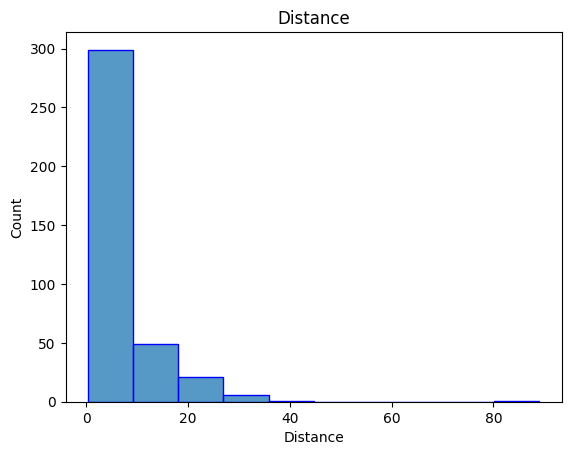

In [171]:
sns.histplot(df['Distance'], bins=10, edgecolor='blue')
plt.ylabel('Count')
plt.title('Distance')
plt.show()

In [172]:
df = df[(df['Distance'] <= 80)]
df.shape

(376, 25)

In [173]:
df

,Home_address,Work_address,Gender,Age,Driver_licence,Truck_licence,Motor_licence,Car_access,Bike_access,Skate_access,...,Time,Depart_time,Convenience,Cost,Safety,Environment,Health,Weather,Parking,Distance
0,"Μουδανιών 8, Καλαμαριά 551 32","Αγίας Αναστασίας 1, Θεσσαλονίκη 546 34",Άνδρας,21 - 30,0,0,0,0,0,0,...,60,09.00 - 12.00,1,3,2,4,5,3,4,8.00
1,"Αλ. Παπαναστασίου 3, Καλαμαριά 551 32","Λεωφ. Νίκης 1, Θεσσαλονίκη 546 24",Άνδρας,21 - 30,0,0,0,0,0,0,...,40,06.00 - 09.00,4,4,4,2,2,2,3,7.60
2,"Χαιριανών 6, Καλαμαριά 551 33","Τσιμισκή 29, Θεσσαλονίκη 546 24",Γυναίκα,21 - 30,0,0,0,0,0,0,...,35,06.00 - 09.00,4,5,3,2,1,4,2,6.60
3,"Αλεξιάδη Κωνσταντίνου 7, Καλαμαριά 551 32","Κων/νου Καραμανλή 46, Καλαμαριά 551 32",Γυναίκα,21 - 30,1,0,1,1,0,0,...,6,06.00 - 09.00,5,3,3,3,3,5,3,0.35
4,"Κρώμνης 38, Καλαμαριά 551 31","Φλέμινγκ 7, Σίνδος 574 00",Άνδρας,21 - 30,1,0,0,1,0,0,...,46,06.00 - 09.00,5,5,5,2,3,5,5,19.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,"Γεωργίου Σεφέρη 54, Νεάπολη 567 28","Παύλου Μελά 74, Πυλαία 555 35",Άνδρας,31 -40,1,0,1,1,0,0,...,18,12.00 - 15.00,5,3,5,3,3,3,5,8.60
379,"Θωμά Καλλιβούλου 31, Αμπελόκηποι 561 21","Λαχανά 25, Πυλαία 555 35",Γυναίκα,41 - 50,1,0,0,0,0,0,...,60,09.00 - 12.00,3,5,3,5,3,3,3,9.70
380,"Μπαρκόπουλου 23, Θεσσαλονίκη 561 23","Φιλικής Εταιρείας 19, Θεσσαλονίκη 546 21",Άνδρας,21 - 30,1,0,0,0,1,1,...,44,06.00 - 09.00,4,3,3,4,5,5,3,3.20
381,"Χρυσοστόμου Σμύρνης 33, Καλαμαριά 551 32","Τάκη Οικονομίδη 25, Καλαμαριά 551 31",Γυναίκα,21 - 30,0,0,0,0,0,0,...,18,12.00 - 15.00,4,5,3,4,3,3,3,2.20


In [174]:
# Create a geolocator instance with a unique user agent
geolocator = Nominatim(user_agent="MyGeocodingApp_Marios_Melachroinos_v212324")


# Function to get coordinates for an address
def get_coordinates(address):
    location = geolocator.geocode(address)
    if location:
        return location.latitude, location.longitude
    else:
        return None

# Function to calculate distance between home and work coordinates
def calculate_distance(row):
    home_coords = get_coordinates(row['Home_address'])
    work_coords = get_coordinates(row['Work_address'])
    
    if home_coords and work_coords:
        return geodesic(home_coords, work_coords).kilometers
    else:
        return None

# Apply the calculate_distance function to each row in the DataFrame
df['Geodesic_distance'] = df.apply(calculate_distance, axis=1)

In [175]:
df

,Home_address,Work_address,Gender,Age,Driver_licence,Truck_licence,Motor_licence,Car_access,Bike_access,Skate_access,...,Depart_time,Convenience,Cost,Safety,Environment,Health,Weather,Parking,Distance,Geodesic_distance
0,"Μουδανιών 8, Καλαμαριά 551 32","Αγίας Αναστασίας 1, Θεσσαλονίκη 546 34",Άνδρας,21 - 30,0,0,0,0,0,0,...,09.00 - 12.00,1,3,2,4,5,3,4,8.00,7.157182
1,"Αλ. Παπαναστασίου 3, Καλαμαριά 551 32","Λεωφ. Νίκης 1, Θεσσαλονίκη 546 24",Άνδρας,21 - 30,0,0,0,0,0,0,...,06.00 - 09.00,4,4,4,2,2,2,3,7.60,13.814558
2,"Χαιριανών 6, Καλαμαριά 551 33","Τσιμισκή 29, Θεσσαλονίκη 546 24",Γυναίκα,21 - 30,0,0,0,0,0,0,...,06.00 - 09.00,4,5,3,2,1,4,2,6.60,6.063515
3,"Αλεξιάδη Κωνσταντίνου 7, Καλαμαριά 551 32","Κων/νου Καραμανλή 46, Καλαμαριά 551 32",Γυναίκα,21 - 30,1,0,1,1,0,0,...,06.00 - 09.00,5,3,3,3,3,5,3,0.35,NaN
4,"Κρώμνης 38, Καλαμαριά 551 31","Φλέμινγκ 7, Σίνδος 574 00",Άνδρας,21 - 30,1,0,0,1,0,0,...,06.00 - 09.00,5,5,5,2,3,5,5,19.60,15.336887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,"Γεωργίου Σεφέρη 54, Νεάπολη 567 28","Παύλου Μελά 74, Πυλαία 555 35",Άνδρας,31 -40,1,0,1,1,0,0,...,12.00 - 15.00,5,3,5,3,3,3,5,8.60,7.410076
379,"Θωμά Καλλιβούλου 31, Αμπελόκηποι 561 21","Λαχανά 25, Πυλαία 555 35",Γυναίκα,41 - 50,1,0,0,0,0,0,...,09.00 - 12.00,3,5,3,5,3,3,3,9.70,8.696364
380,"Μπαρκόπουλου 23, Θεσσαλονίκη 561 23","Φιλικής Εταιρείας 19, Θεσσαλονίκη 546 21",Άνδρας,21 - 30,1,0,0,0,1,1,...,06.00 - 09.00,4,3,3,4,5,5,3,3.20,2.769366
381,"Χρυσοστόμου Σμύρνης 33, Καλαμαριά 551 32","Τάκη Οικονομίδη 25, Καλαμαριά 551 31",Γυναίκα,21 - 30,0,0,0,0,0,0,...,12.00 - 15.00,4,5,3,4,3,3,3,2.20,1.869763


In [176]:
df['Geodesic_distance'].fillna(df['Distance'], inplace=True)

In [177]:
df

,Home_address,Work_address,Gender,Age,Driver_licence,Truck_licence,Motor_licence,Car_access,Bike_access,Skate_access,...,Depart_time,Convenience,Cost,Safety,Environment,Health,Weather,Parking,Distance,Geodesic_distance
0,"Μουδανιών 8, Καλαμαριά 551 32","Αγίας Αναστασίας 1, Θεσσαλονίκη 546 34",Άνδρας,21 - 30,0,0,0,0,0,0,...,09.00 - 12.00,1,3,2,4,5,3,4,8.00,7.157182
1,"Αλ. Παπαναστασίου 3, Καλαμαριά 551 32","Λεωφ. Νίκης 1, Θεσσαλονίκη 546 24",Άνδρας,21 - 30,0,0,0,0,0,0,...,06.00 - 09.00,4,4,4,2,2,2,3,7.60,13.814558
2,"Χαιριανών 6, Καλαμαριά 551 33","Τσιμισκή 29, Θεσσαλονίκη 546 24",Γυναίκα,21 - 30,0,0,0,0,0,0,...,06.00 - 09.00,4,5,3,2,1,4,2,6.60,6.063515
3,"Αλεξιάδη Κωνσταντίνου 7, Καλαμαριά 551 32","Κων/νου Καραμανλή 46, Καλαμαριά 551 32",Γυναίκα,21 - 30,1,0,1,1,0,0,...,06.00 - 09.00,5,3,3,3,3,5,3,0.35,0.350000
4,"Κρώμνης 38, Καλαμαριά 551 31","Φλέμινγκ 7, Σίνδος 574 00",Άνδρας,21 - 30,1,0,0,1,0,0,...,06.00 - 09.00,5,5,5,2,3,5,5,19.60,15.336887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,"Γεωργίου Σεφέρη 54, Νεάπολη 567 28","Παύλου Μελά 74, Πυλαία 555 35",Άνδρας,31 -40,1,0,1,1,0,0,...,12.00 - 15.00,5,3,5,3,3,3,5,8.60,7.410076
379,"Θωμά Καλλιβούλου 31, Αμπελόκηποι 561 21","Λαχανά 25, Πυλαία 555 35",Γυναίκα,41 - 50,1,0,0,0,0,0,...,09.00 - 12.00,3,5,3,5,3,3,3,9.70,8.696364
380,"Μπαρκόπουλου 23, Θεσσαλονίκη 561 23","Φιλικής Εταιρείας 19, Θεσσαλονίκη 546 21",Άνδρας,21 - 30,1,0,0,0,1,1,...,06.00 - 09.00,4,3,3,4,5,5,3,3.20,2.769366
381,"Χρυσοστόμου Σμύρνης 33, Καλαμαριά 551 32","Τάκη Οικονομίδη 25, Καλαμαριά 551 31",Γυναίκα,21 - 30,0,0,0,0,0,0,...,12.00 - 15.00,4,5,3,4,3,3,3,2.20,1.869763


In [178]:
drops = [
        'Home_address','Work_address']
df = df.drop(drops, axis=1)

In [179]:
df

,Gender,Age,Driver_licence,Truck_licence,Motor_licence,Car_access,Bike_access,Skate_access,Motor_access,Hsize,...,Depart_time,Convenience,Cost,Safety,Environment,Health,Weather,Parking,Distance,Geodesic_distance
0,Άνδρας,21 - 30,0,0,0,0,0,0,0,4,...,09.00 - 12.00,1,3,2,4,5,3,4,8.00,7.157182
1,Άνδρας,21 - 30,0,0,0,0,0,0,0,3,...,06.00 - 09.00,4,4,4,2,2,2,3,7.60,13.814558
2,Γυναίκα,21 - 30,0,0,0,0,0,0,0,3,...,06.00 - 09.00,4,5,3,2,1,4,2,6.60,6.063515
3,Γυναίκα,21 - 30,1,0,1,1,0,0,1,4,...,06.00 - 09.00,5,3,3,3,3,5,3,0.35,0.350000
4,Άνδρας,21 - 30,1,0,0,1,0,0,0,3,...,06.00 - 09.00,5,5,5,2,3,5,5,19.60,15.336887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,Άνδρας,31 -40,1,0,1,1,0,0,1,4,...,12.00 - 15.00,5,3,5,3,3,3,5,8.60,7.410076
379,Γυναίκα,41 - 50,1,0,0,0,0,0,0,1,...,09.00 - 12.00,3,5,3,5,3,3,3,9.70,8.696364
380,Άνδρας,21 - 30,1,0,0,0,1,1,0,3,...,06.00 - 09.00,4,3,3,4,5,5,3,3.20,2.769366
381,Γυναίκα,21 - 30,0,0,0,0,0,0,0,3,...,12.00 - 15.00,4,5,3,4,3,3,3,2.20,1.869763


# EDA

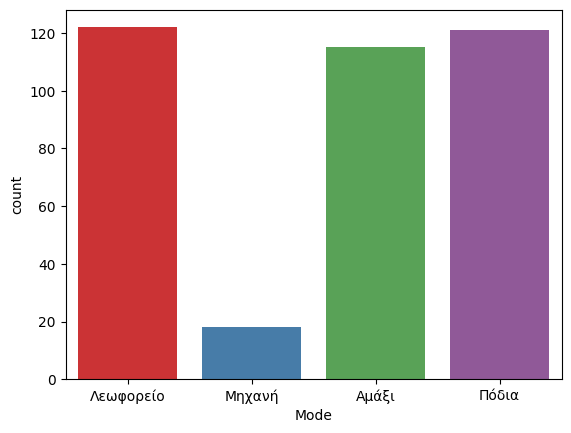

In [180]:
sns.countplot(x='Mode', data=df, palette='Set1')
plt.show()

In [181]:
perc=df['Mode'].value_counts(True)*100
print(perc)

Mode
Λεωφορείο    32.446809
Πόδια        32.180851
Αμάξι        30.585106
Μηχανή        4.787234
Name: proportion, dtype: float64


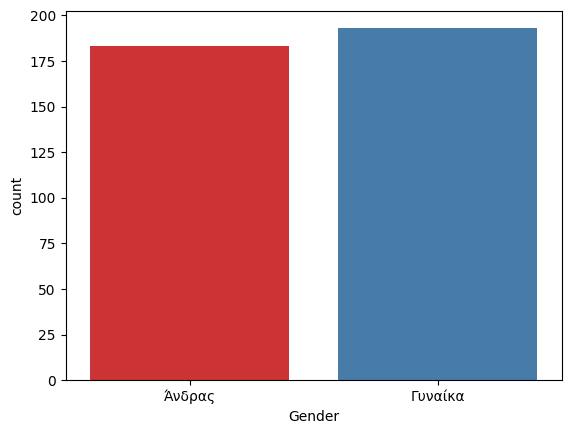

In [182]:
sns.countplot(x='Gender', data=df, palette='Set1')
plt.show()

In [183]:
perc=df['Gender'].value_counts(True)*100
print(perc)

Gender
Γυναίκα    51.329787
Άνδρας     48.670213
Name: proportion, dtype: float64


In [184]:
df['Driver_licence'] = df['Driver_licence'].map({0: 'No', 1: 'Yes'})

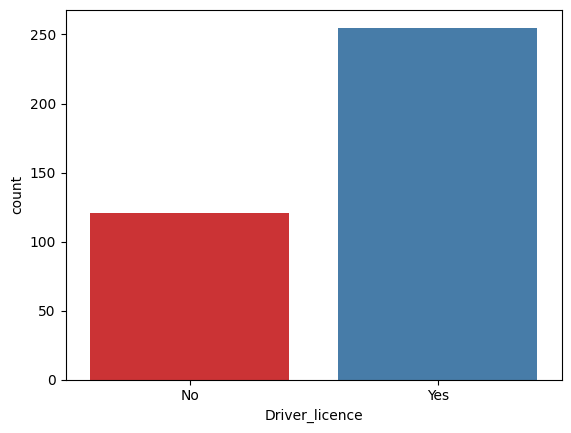

In [185]:
sns.countplot(x='Driver_licence', data=df, palette='Set1')
plt.show()

In [186]:
perc=df['Driver_licence'].value_counts(True)*100
print(perc)

Driver_licence
Yes    67.819149
No     32.180851
Name: proportion, dtype: float64


In [187]:
df['Truck_licence'] = df['Truck_licence'].map({0: 'No', 1: 'Yes'})

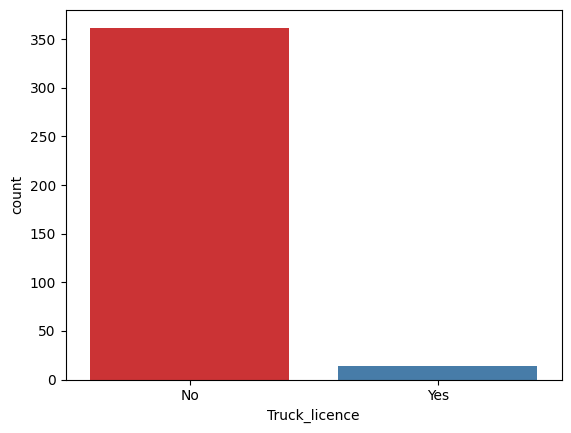

In [188]:
sns.countplot(x='Truck_licence', data=df, palette='Set1')
plt.show()

In [189]:
perc=df['Truck_licence'].value_counts(True)*100
print(perc)

Truck_licence
No     96.276596
Yes     3.723404
Name: proportion, dtype: float64


In [190]:
df['Motor_licence'] = df['Motor_licence'].map({0: 'No', 1: 'Yes'})

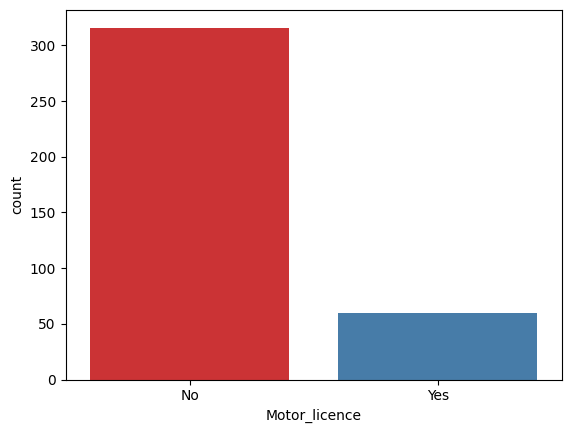

In [191]:
sns.countplot(x='Motor_licence', data=df, palette='Set1')
plt.show()

In [192]:
perc=df['Motor_licence'].value_counts(True)*100
print(perc)

Motor_licence
No     84.042553
Yes    15.957447
Name: proportion, dtype: float64


In [193]:
df['Bike_access'] = df['Bike_access'].map({0: 'No', 1: 'Yes'})

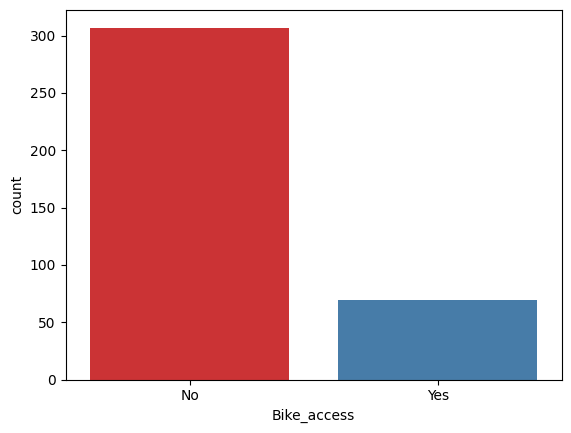

In [194]:
sns.countplot(x='Bike_access', data=df, palette='Set1')
plt.show()

In [195]:
perc=df['Bike_access'].value_counts(True)*100
print(perc)

Bike_access
No     81.648936
Yes    18.351064
Name: proportion, dtype: float64


In [196]:
df['Car_access'] = df['Car_access'].map({0: 'No', 1: 'Yes'})

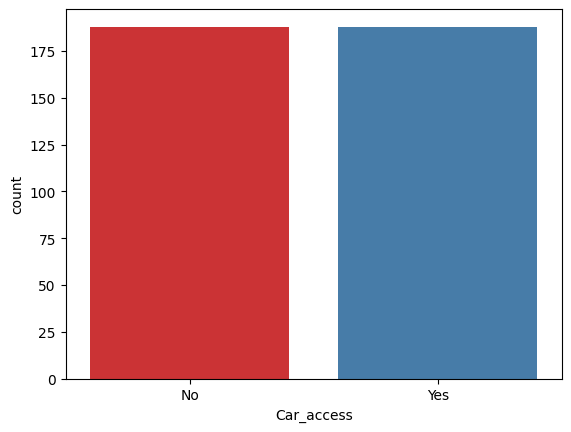

In [197]:
sns.countplot(x='Car_access', data=df, palette='Set1')
plt.show()

In [198]:
perc=df['Car_access'].value_counts(True)*100
print(perc)

Car_access
No     50.0
Yes    50.0
Name: proportion, dtype: float64


In [199]:
df['Motor_access'] = df['Motor_access'].map({0: 'No', 1: 'Yes'})

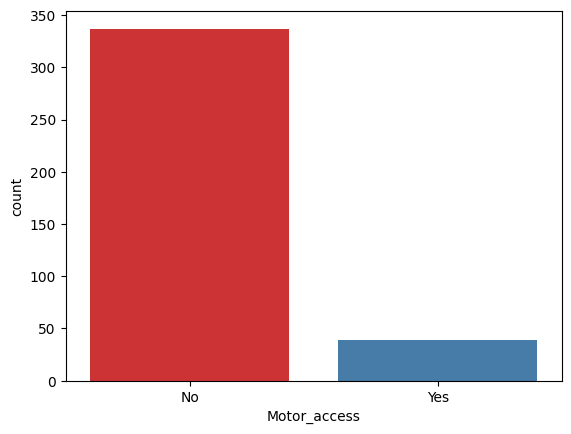

In [200]:
sns.countplot(x='Motor_access', data=df, palette='Set1')
plt.show()

In [201]:
perc=df['Motor_access'].value_counts(True)*100
print(perc)

Motor_access
No     89.62766
Yes    10.37234
Name: proportion, dtype: float64


In [202]:
df['Skate_access'] = df['Skate_access'].map({0: 'No', 1: 'Yes'})

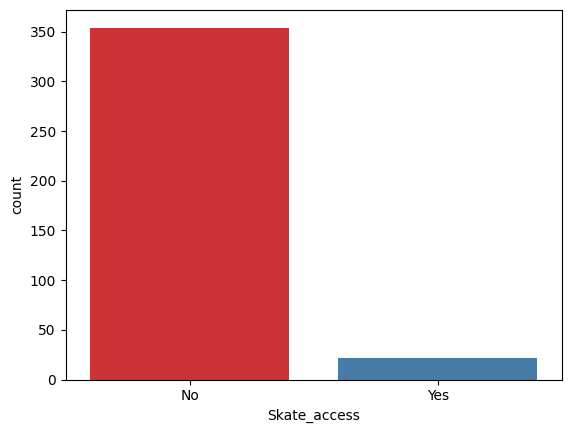

In [203]:
sns.countplot(x='Skate_access', data=df, palette='Set1')
plt.show()

In [204]:
perc=df['Skate_access'].value_counts(True)*100
print(perc)

Skate_access
No     94.148936
Yes     5.851064
Name: proportion, dtype: float64


In [205]:
order_time = ["06.00 - 09.00", "09.00 - 12.00", "12.00 - 15.00", "15.00 - 18.00", "18.00 - 21.00", "00.00 - 03.00", "03.00 - 06.00"]

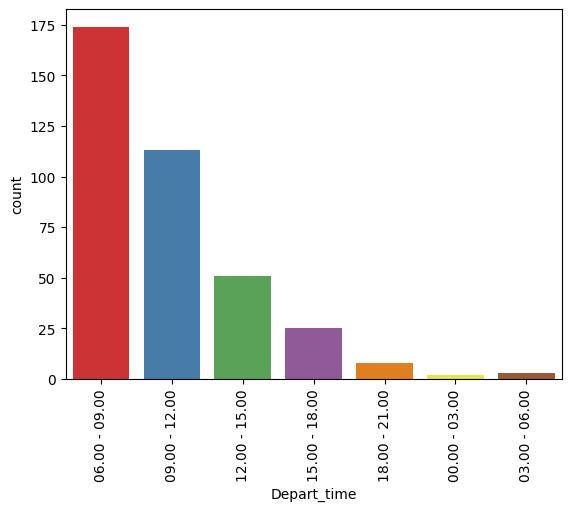

In [206]:
sns.countplot(x='Depart_time', data=df, order=order_time, palette='Set1')
plt.xticks(rotation=90)
plt.show()

In [207]:
perc=df['Depart_time'].value_counts(True)*100
print(perc)

Depart_time
06.00 - 09.00    46.276596
09.00 - 12.00    30.053191
12.00 - 15.00    13.563830
15.00 - 18.00     6.648936
18.00 - 21.00     2.127660
03.00 - 06.00     0.797872
00.00 - 03.00     0.531915
Name: proportion, dtype: float64


In [208]:
order_income = ["0 - 500", "500 - 1000", "1000 - 1500", "1500 - 2000", "2000 και άνω"]

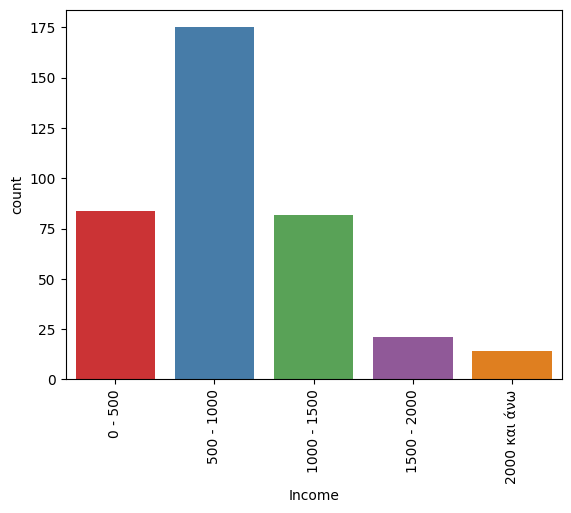

In [209]:
sns.countplot(x='Income', data=df, palette='Set1', order=order_income)
plt.xticks(rotation=90)
plt.show()

In [210]:
perc=df['Income'].value_counts(True)*100
print(perc)

Income
500 - 1000      46.542553
0 - 500         22.340426
1000 - 1500     21.808511
1500 - 2000      5.585106
2000 και άνω     3.723404
Name: proportion, dtype: float64


In [211]:
df['Convenience'] = df['Convenience'].map({1: "Totally disagree", 2: "Disagree", 3: "Neutral", 4: "Agree", 5: "Totally agree"})

In [212]:
order_likert = ["Totally disagree", "Disagree", "Neutral", "Agree", "Totally agree"]

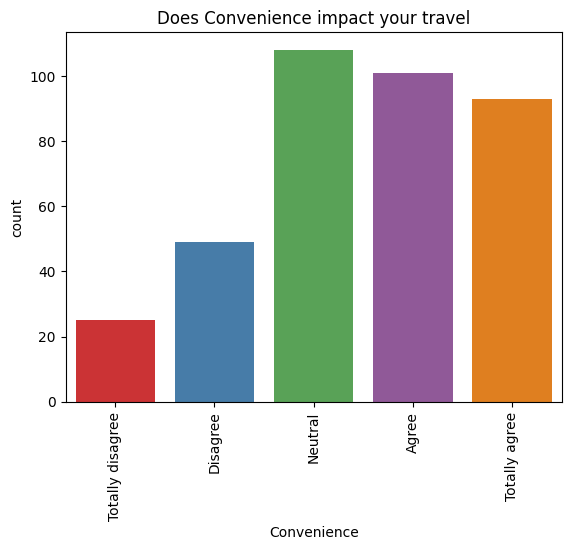

In [213]:
sns.countplot(x='Convenience', data=df, order = order_likert, palette='Set1')
plt.title('Does Convenience impact your travel')
plt.xticks(rotation=90)
plt.show()

In [214]:
perc=df['Convenience'].value_counts(True)*100
print(perc)

Convenience
Neutral             28.723404
Agree               26.861702
Totally agree       24.734043
Disagree            13.031915
Totally disagree     6.648936
Name: proportion, dtype: float64


In [215]:
df['Cost'] = df['Cost'].map({1: "Totally disagree", 2: "Disagree", 3: "Neutral", 4: "Agree", 5: "Totally agree"})

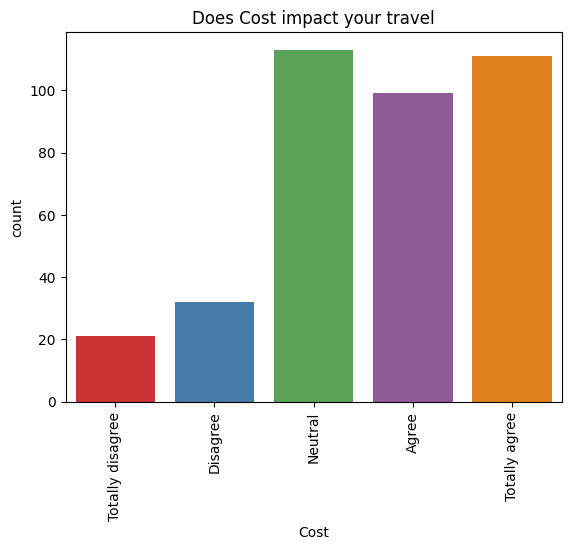

In [216]:
sns.countplot(x='Cost', data=df, order = order_likert, palette='Set1')
plt.title('Does Cost impact your travel')
plt.xticks(rotation=90)
plt.show()

In [217]:
perc=df['Cost'].value_counts(True)*100
print(perc)

Cost
Neutral             30.053191
Totally agree       29.521277
Agree               26.329787
Disagree             8.510638
Totally disagree     5.585106
Name: proportion, dtype: float64


In [218]:
df['Health'] = df['Health'].map({1: "Totally disagree", 2: "Disagree", 3: "Neutral", 4: "Agree", 5: "Totally agree"})

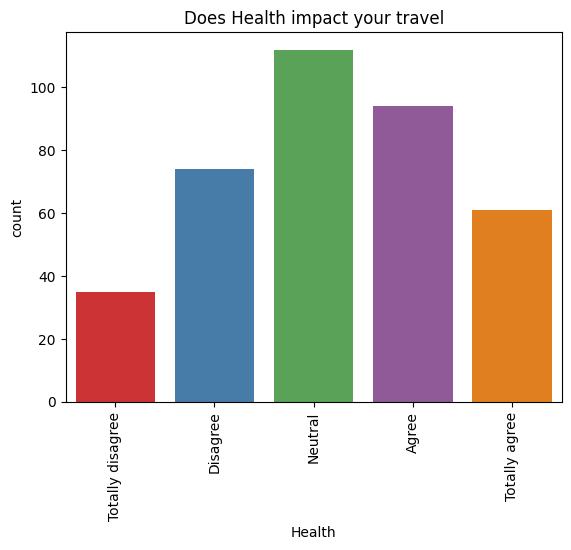

In [219]:
sns.countplot(x='Health', data=df, order=order_likert, palette='Set1')
plt.title('Does Health impact your travel')
plt.xticks(rotation=90)
plt.show()

In [220]:
perc=df['Health'].value_counts(True)*100
print(perc)

Health
Neutral             29.787234
Agree               25.000000
Disagree            19.680851
Totally agree       16.223404
Totally disagree     9.308511
Name: proportion, dtype: float64


In [221]:
df['Safety'] = df['Safety'].map({1: "Totally disagree", 2: "Disagree", 3: "Neutral", 4: "Agree", 5: "Totally agree"})

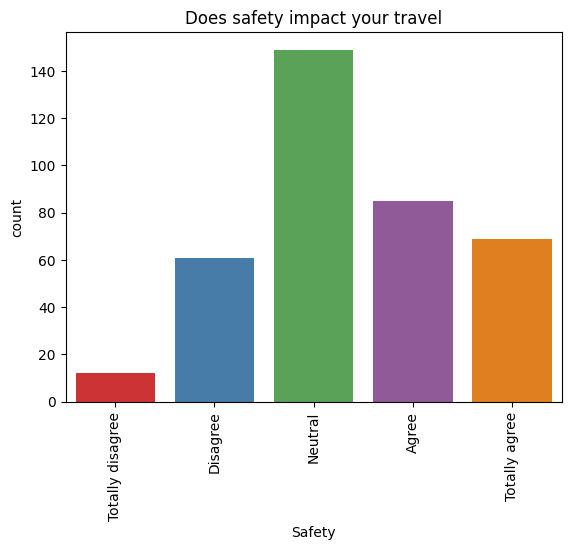

In [222]:
sns.countplot(x='Safety', data=df, order=order_likert, palette='Set1')
plt.title('Does safety impact your travel')
plt.xticks(rotation=90)
plt.show()

In [223]:
perc=df['Safety'].value_counts(True)*100
print(perc)

Safety
Neutral             39.627660
Agree               22.606383
Totally agree       18.351064
Disagree            16.223404
Totally disagree     3.191489
Name: proportion, dtype: float64


In [224]:
df['Environment'] = df['Environment'].map({1: "Totally disagree", 2: "Disagree", 3: "Neutral", 4: "Agree", 5: "Totally agree"})

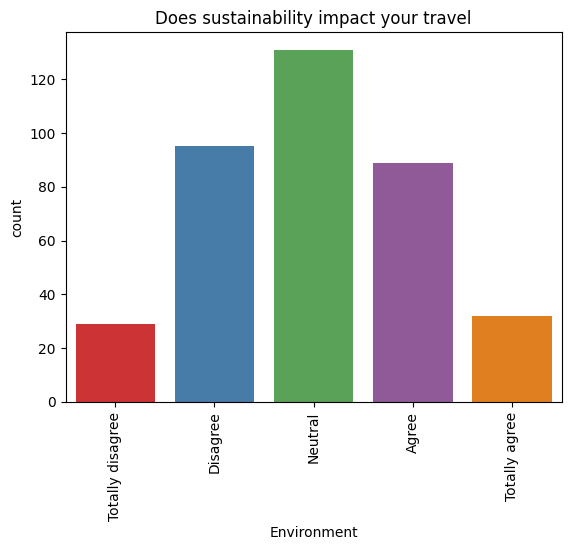

In [225]:
sns.countplot(x='Environment', data=df, order=order_likert, palette='Set1')
plt.title('Does sustainability impact your travel')
plt.xticks(rotation=90)
plt.show()

In [226]:
perc=df['Environment'].value_counts(True)*100
print(perc)

Environment
Neutral             34.840426
Disagree            25.265957
Agree               23.670213
Totally agree        8.510638
Totally disagree     7.712766
Name: proportion, dtype: float64


In [227]:
df['Parking'] = df['Parking'].map({1: "Totally disagree", 2: "Disagree", 3: "Neutral", 4: "Agree", 5: "Totally agree"})

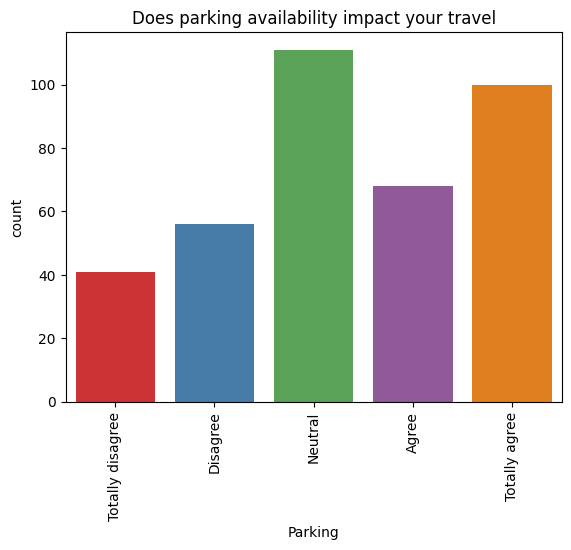

In [228]:
sns.countplot(x='Parking', data=df, order=order_likert, palette='Set1')
plt.title('Does parking availability impact your travel')
plt.xticks(rotation=90)
plt.show()

In [229]:
perc=df['Parking'].value_counts(True)*100
print(perc)

Parking
Neutral             29.521277
Totally agree       26.595745
Agree               18.085106
Disagree            14.893617
Totally disagree    10.904255
Name: proportion, dtype: float64


In [230]:
df['Weather'] = df['Weather'].map({1: "Totally disagree", 2: "Disagree", 3: "Neutral", 4: "Agree", 5: "Totally agree"})

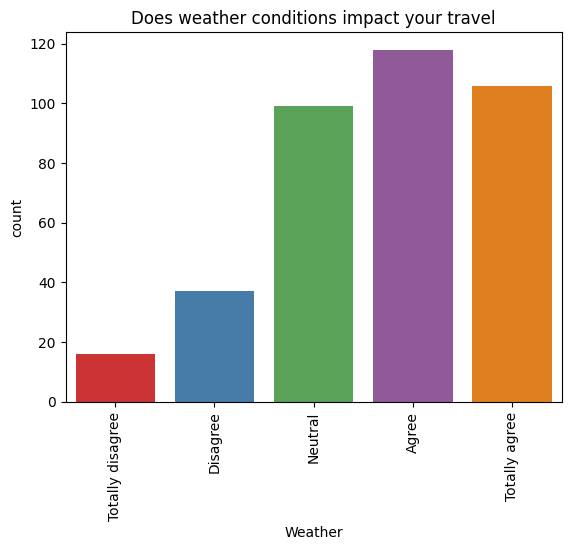

In [231]:
sns.countplot(x='Weather', data=df, order=order_likert, palette='Set1')
plt.title('Does weather conditions impact your travel')
plt.xticks(rotation=90)
plt.show()

In [232]:
perc=df['Weather'].value_counts(True)*100
print(perc)

Weather
Agree               31.382979
Totally agree       28.191489
Neutral             26.329787
Disagree             9.840426
Totally disagree     4.255319
Name: proportion, dtype: float64


In [233]:
order_age = ["20 και κάτω", "21 - 30", "31 -40", "41 - 50", "51 - 60"]

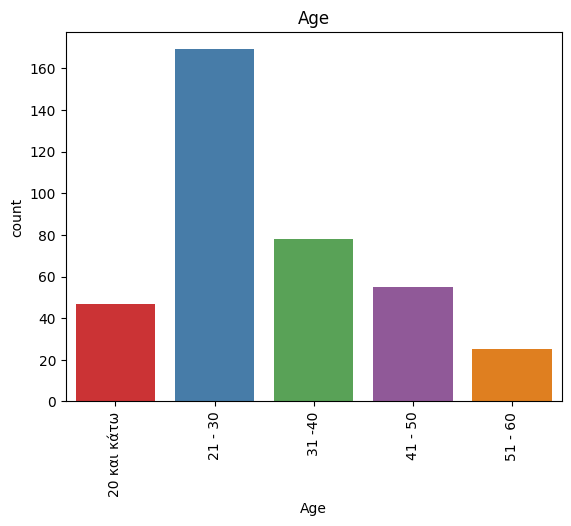

In [234]:
sns.countplot(x='Age', data=df, order = order_age, palette='Set1')
plt.title('Age')
plt.xticks(rotation=90)
plt.show()

In [235]:
perc=df['Age'].value_counts(True)*100
print(perc)

Age
21 - 30        44.946809
31 -40         20.744681
41 - 50        14.627660
20 και κάτω    12.500000
51 - 60         6.648936
61 και άνω      0.531915
Name: proportion, dtype: float64


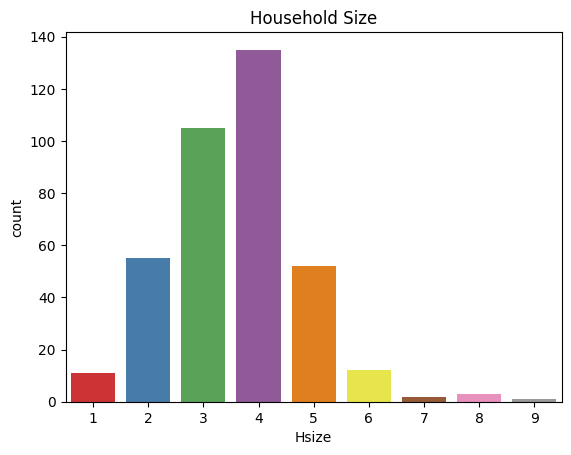

In [236]:
sns.countplot(x='Hsize', data=df, palette='Set1')
plt.title('Household Size')
plt.show()

In [237]:
perc=df['Hsize'].value_counts(True)*100
print(perc)

Hsize
4    35.904255
3    27.925532
2    14.627660
5    13.829787
6     3.191489
1     2.925532
8     0.797872
7     0.531915
9     0.265957
Name: proportion, dtype: float64


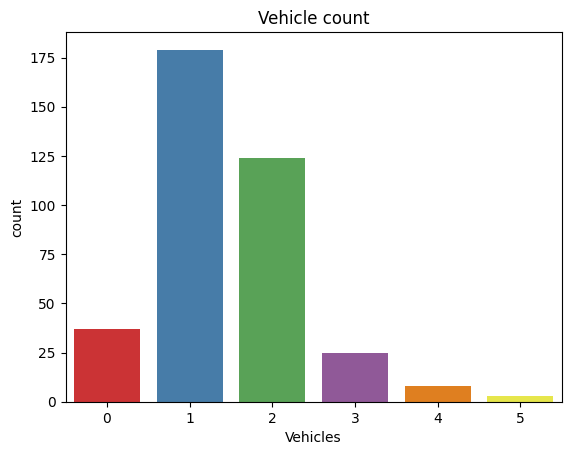

In [238]:
sns.countplot(x='Vehicles', data=df, palette='Set1')
plt.title('Vehicle count')
plt.show()

In [239]:
perc=df['Vehicles'].value_counts(True)*100
print(perc)

Vehicles
1    47.606383
2    32.978723
0     9.840426
3     6.648936
4     2.127660
5     0.797872
Name: proportion, dtype: float64


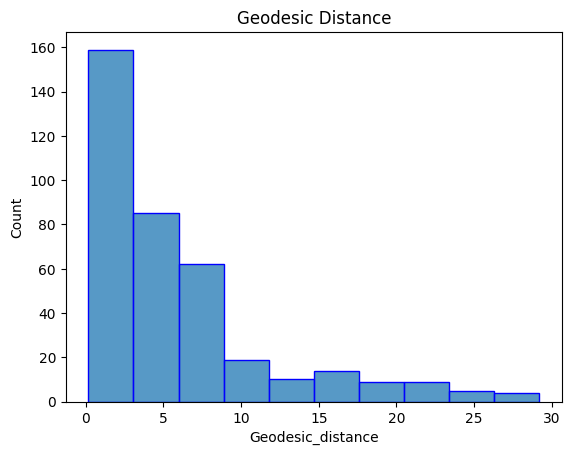

In [240]:
sns.histplot(df['Geodesic_distance'], bins=10, edgecolor='blue')
plt.ylabel('Count')
plt.title('Geodesic Distance')
plt.show()

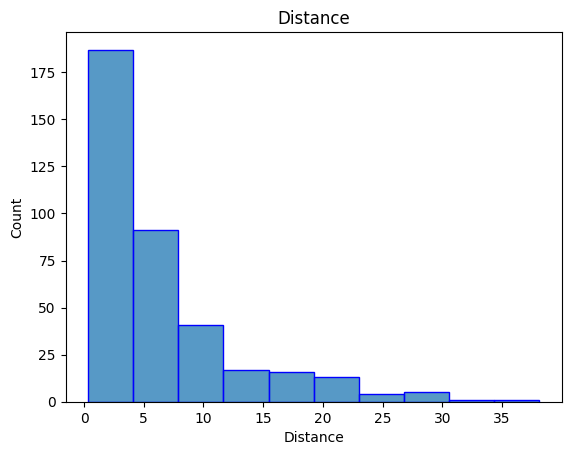

In [241]:
sns.histplot(df['Distance'], bins=10, edgecolor='blue')
plt.ylabel('Count')
plt.title('Distance')
plt.show()

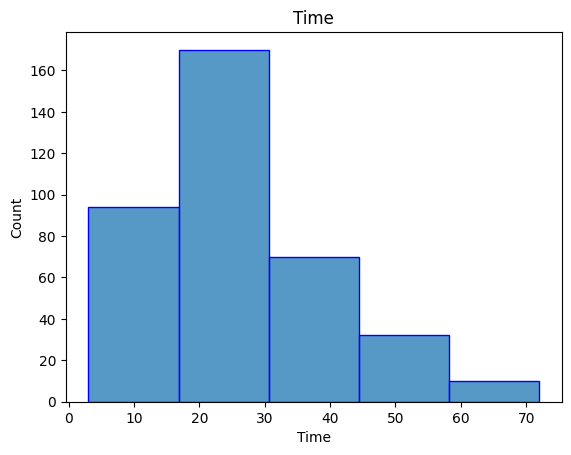

In [242]:
sns.histplot(df['Time'], bins=5, edgecolor='blue')
plt.ylabel('Count')
plt.title('Time')
plt.show()

In [243]:
df.describe()

,Hsize,Vehicles,Time,Distance,Geodesic_distance
count,376.000000,376.000000,376.000000,376.000000,376.000000
mean,3.603723,1.460106,25.781915,6.379521,5.924537
std,1.217598,0.896514,13.303445,6.423736,5.991894
min,1.000000,0.000000,3.000000,0.350000,0.159077
25%,3.000000,1.000000,16.750000,1.800000,1.713010
50%,4.000000,1.000000,23.000000,4.250000,3.956410
75%,4.000000,2.000000,34.000000,8.000000,7.355192
max,9.000000,5.000000,72.000000,38.100000,29.200000


In [244]:
df.shape

(376, 24)

# Συνδυαστικα Γραφήματα

In [245]:
mode_colors = {'Αμάξι': 'blue', 'Λεωφορείο': 'orange', 'Πόδια': 'green', 'Μηχανή':'red'}

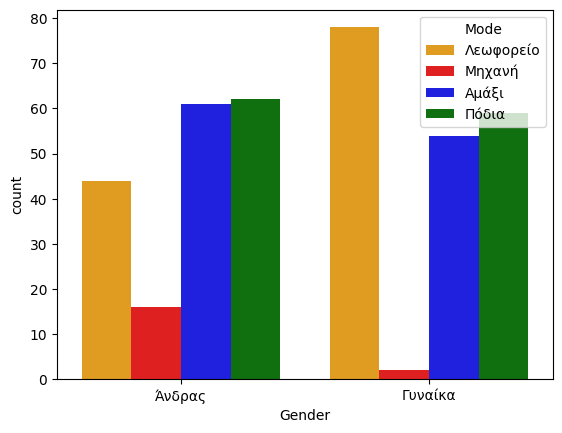

In [246]:
sns.countplot(x='Gender', data=df,hue='Mode', palette=mode_colors)
plt.show()

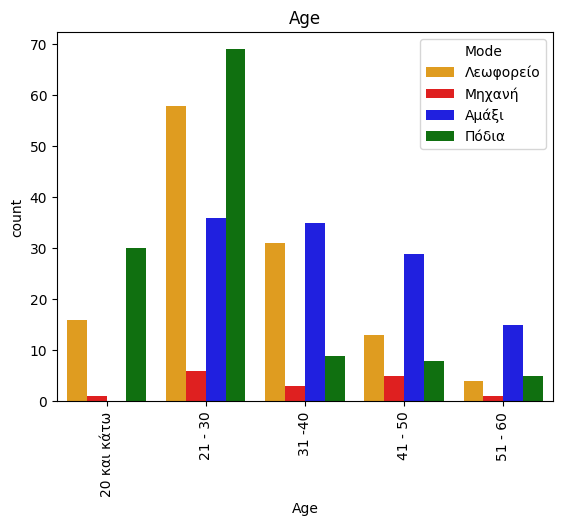

In [247]:
sns.countplot(x='Age', data=df, order = order_age, hue='Mode', palette=mode_colors)
plt.title('Age')
plt.xticks(rotation=90)
plt.show()

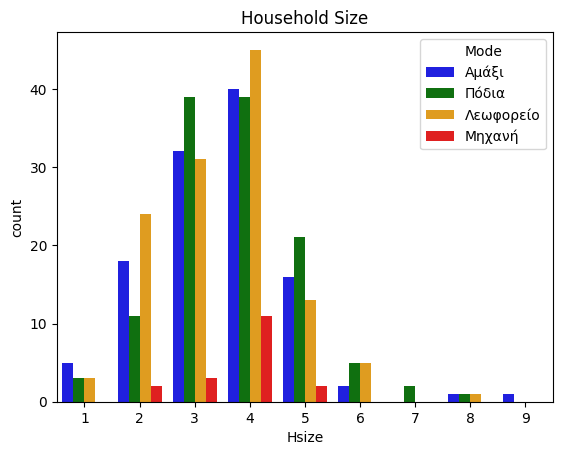

In [248]:
sns.countplot(x='Hsize', data=df, hue='Mode', palette=mode_colors)
plt.title('Household Size')
plt.show()

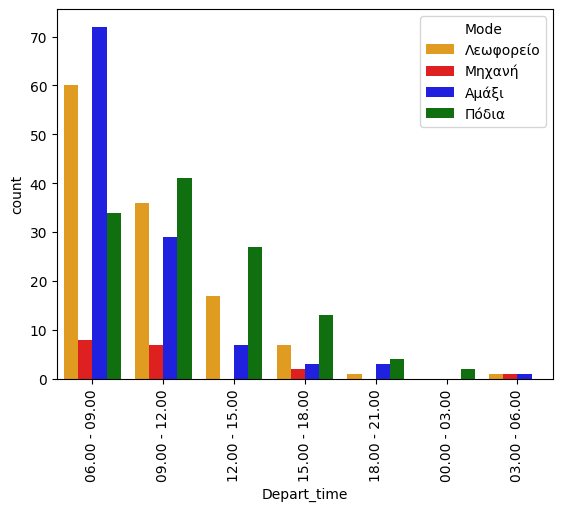

In [249]:
sns.countplot(x='Depart_time', data=df, order=order_time, hue='Mode', palette=mode_colors)
plt.xticks(rotation=90)
plt.show()

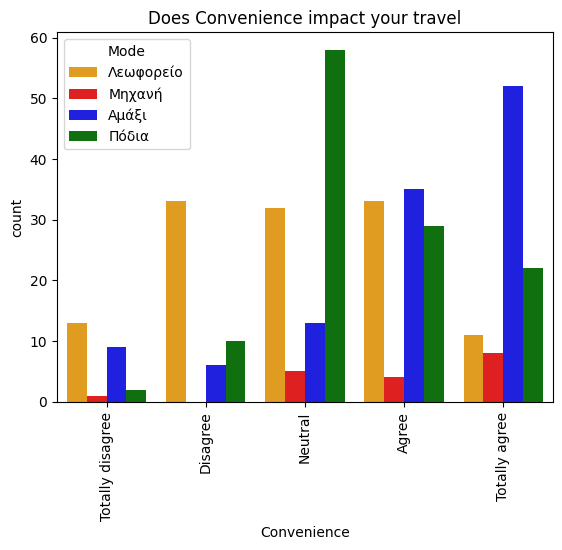

In [250]:
sns.countplot(x='Convenience', data=df, order = order_likert, hue='Mode', palette=mode_colors)
plt.title('Does Convenience impact your travel')
plt.xticks(rotation=90)
plt.show()

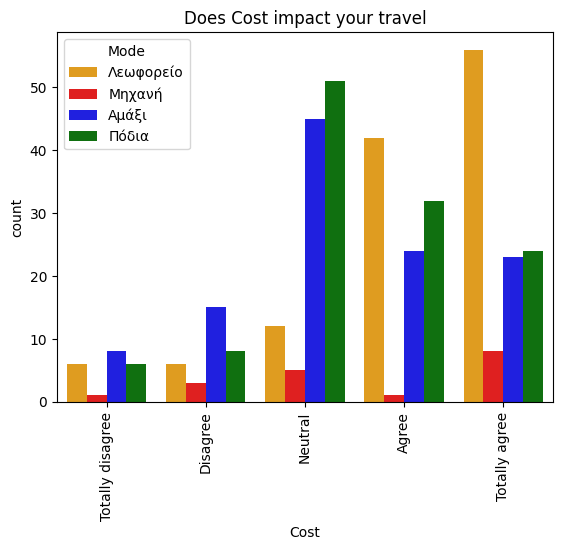

In [251]:
sns.countplot(x='Cost', data=df, order = order_likert, hue='Mode', palette=mode_colors)
plt.title('Does Cost impact your travel')
plt.xticks(rotation=90)
plt.show()

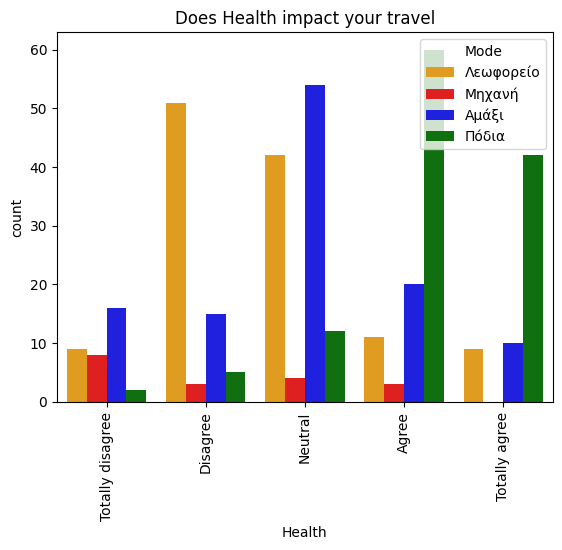

In [252]:
sns.countplot(x='Health', data=df, order=order_likert, hue='Mode', palette=mode_colors)
plt.title('Does Health impact your travel')
plt.xticks(rotation=90)
plt.show()

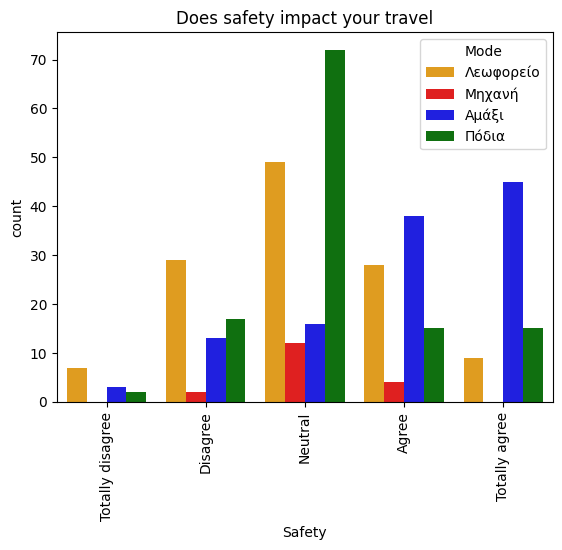

In [253]:
sns.countplot(x='Safety', data=df, order=order_likert, hue='Mode', palette=mode_colors)
plt.title('Does safety impact your travel')
plt.xticks(rotation=90)
plt.show()

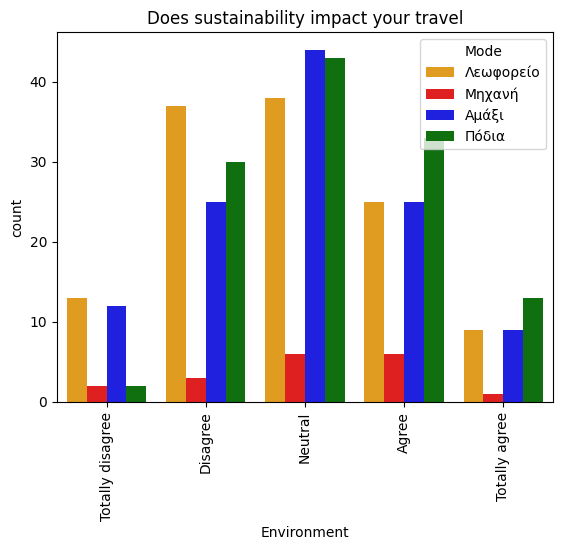

In [254]:
sns.countplot(x='Environment', data=df, order=order_likert, hue='Mode', palette=mode_colors)
plt.title('Does sustainability impact your travel')
plt.xticks(rotation=90)
plt.show()

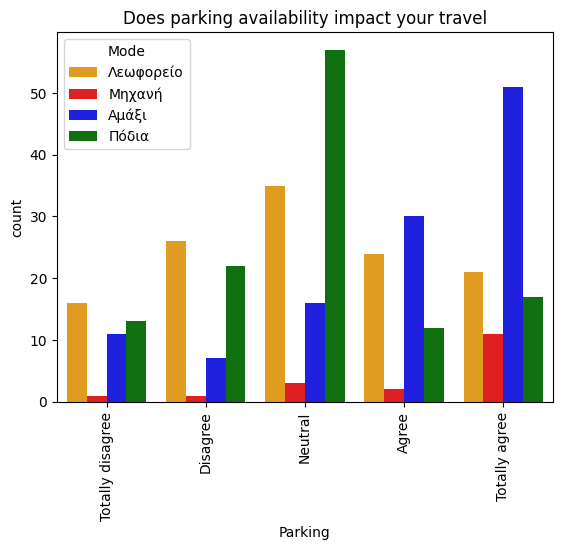

In [255]:
sns.countplot(x='Parking', data=df, order=order_likert, hue='Mode', palette=mode_colors)
plt.title('Does parking availability impact your travel')
plt.xticks(rotation=90)
plt.show()

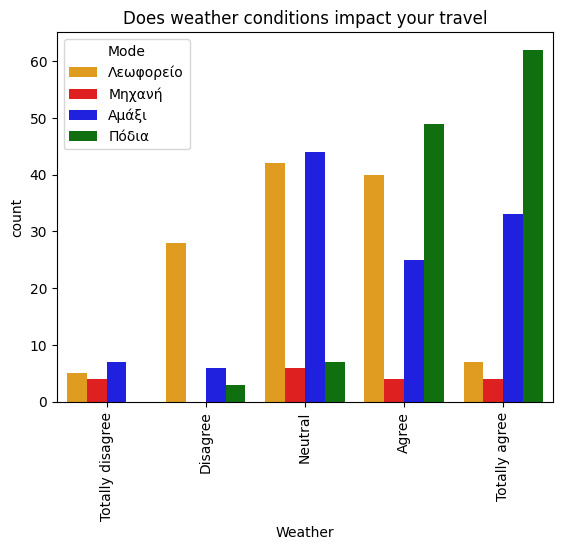

In [256]:
sns.countplot(x='Weather', data=df, order=order_likert, hue='Mode', palette=mode_colors)
plt.title('Does weather conditions impact your travel')
plt.xticks(rotation=90)
plt.show()

# PREPROCESS

In [257]:
value_mapping = {"Totally disagree":1, "Disagree":2, "Neutral":3, "Agree":4, "Totally agree":5}
df['Convenience'] = df['Convenience'].replace(value_mapping)

In [258]:
value_mapping = {"Totally disagree":1, "Disagree":2, "Neutral":3, "Agree":4, "Totally agree":5}
df['Cost'] = df['Cost'].replace(value_mapping)

In [259]:
value_mapping = {"Totally disagree":1, "Disagree":2, "Neutral":3, "Agree":4, "Totally agree":5}
df['Safety'] = df['Safety'].replace(value_mapping)

In [260]:
value_mapping = {"Totally disagree":1, "Disagree":2, "Neutral":3, "Agree":4, "Totally agree":5}
df['Health'] = df['Health'].replace(value_mapping)

In [261]:
value_mapping = {"Totally disagree":1, "Disagree":2, "Neutral":3, "Agree":4, "Totally agree":5}
df['Weather'] = df['Weather'].replace(value_mapping)

In [262]:
value_mapping = {"Totally disagree":1, "Disagree":2, "Neutral":3, "Agree":4, "Totally agree":5}
df['Environment'] = df['Environment'].replace(value_mapping)

In [263]:
value_mapping = {"Totally disagree":1, "Disagree":2, "Neutral":3, "Agree":4, "Totally agree":5}
df['Parking'] = df['Parking'].replace(value_mapping)

In [264]:
value_mapping = {"Αμάξι":0, "Λεωφορείο":1, "Πόδια":2, 'Μηχανή':0}
df['Mode'] = df['Mode'].replace(value_mapping)

In [265]:
le=LabelEncoder()
features=["Gender", "Driver_licence", "Truck_licence", "Motor_licence", "Bike_access", "Car_access", "Skate_access", "Motor_access"]
for col in features:
    df[col]=le.fit_transform(df[col])

In [266]:
perc=df['Age'].value_counts(True)*100
print(perc)

Age
21 - 30        44.946809
31 -40         20.744681
41 - 50        14.627660
20 και κάτω    12.500000
51 - 60         6.648936
61 και άνω      0.531915
Name: proportion, dtype: float64


In [267]:
value_mapping = {'1500 - 2000':'1500 και ανω', '2000 και άνω':'1500 και ανω'}
df['Income'] = df['Income'].replace(value_mapping)

In [268]:
value_mapping = {'15.00 - 18.00':'other', '18.00 - 21.00':'other', '03.00 - 06.00':'other', '00.00 - 03.00':'other'}
df['Depart_time'] = df['Depart_time'].replace(value_mapping)

In [269]:
value_mapping = {'51 - 60':'51 και άνω', '61 και άνω':'51 και άνω'}
df['Age'] = df['Age'].replace(value_mapping)

In [270]:
perc=df['Age'].value_counts(True)*100
print(perc)

Age
21 - 30        44.946809
31 -40         20.744681
41 - 50        14.627660
20 και κάτω    12.500000
51 και άνω      7.180851
Name: proportion, dtype: float64


In [271]:
one_hot_encoded = pd.get_dummies(df[['Age', 'Income', 'Depart_time']])

one_hot_encoded = one_hot_encoded.astype(int)

df = pd.concat([df, one_hot_encoded], axis=1)

df

,Gender,Age,Driver_licence,Truck_licence,Motor_licence,Car_access,Bike_access,Skate_access,Motor_access,Hsize,...,Age_41 - 50,Age_51 και άνω,Income_0 - 500,Income_1000 - 1500,Income_1500 και ανω,Income_500 - 1000,Depart_time_06.00 - 09.00,Depart_time_09.00 - 12.00,Depart_time_12.00 - 15.00,Depart_time_other
0,0,21 - 30,0,0,0,0,0,0,0,4,...,0,0,0,0,0,1,0,1,0,0
1,0,21 - 30,0,0,0,0,0,0,0,3,...,0,0,0,0,0,1,1,0,0,0
2,1,21 - 30,0,0,0,0,0,0,0,3,...,0,0,1,0,0,0,1,0,0,0
3,1,21 - 30,1,0,1,1,0,0,1,4,...,0,0,0,0,0,1,1,0,0,0
4,0,21 - 30,1,0,0,1,0,0,0,3,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,0,31 -40,1,0,1,1,0,0,1,4,...,0,0,0,1,0,0,0,0,1,0
379,1,41 - 50,1,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
380,0,21 - 30,1,0,0,0,1,1,0,3,...,0,0,0,0,0,1,1,0,0,0
381,1,21 - 30,0,0,0,0,0,0,0,3,...,0,0,0,0,0,1,0,0,1,0


In [272]:
drops = ['Age', 'Income', 'Depart_time']
df = df.drop(drops, axis=1)

In [273]:
df

,Gender,Driver_licence,Truck_licence,Motor_licence,Car_access,Bike_access,Skate_access,Motor_access,Hsize,Vehicles,...,Age_41 - 50,Age_51 και άνω,Income_0 - 500,Income_1000 - 1500,Income_1500 και ανω,Income_500 - 1000,Depart_time_06.00 - 09.00,Depart_time_09.00 - 12.00,Depart_time_12.00 - 15.00,Depart_time_other
0,0,0,0,0,0,0,0,0,4,3,...,0,0,0,0,0,1,0,1,0,0
1,0,0,0,0,0,0,0,0,3,1,...,0,0,0,0,0,1,1,0,0,0
2,1,0,0,0,0,0,0,0,3,1,...,0,0,1,0,0,0,1,0,0,0
3,1,1,0,1,1,0,0,1,4,4,...,0,0,0,0,0,1,1,0,0,0
4,0,1,0,0,1,0,0,0,3,2,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,0,1,0,1,1,0,0,1,4,2,...,0,0,0,1,0,0,0,0,1,0
379,1,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
380,0,1,0,0,0,1,1,0,3,1,...,0,0,0,0,0,1,1,0,0,0
381,1,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,1,0,0,1,0


In [274]:
df.duplicated().sum()

0

In [275]:
df.isnull().any()

Gender                       False
Driver_licence               False
Truck_licence                False
Motor_licence                False
Car_access                   False
Bike_access                  False
Skate_access                 False
Motor_access                 False
Hsize                        False
Vehicles                     False
Mode                         False
Time                         False
Convenience                  False
Cost                         False
Safety                       False
Environment                  False
Health                       False
Weather                      False
Parking                      False
Distance                     False
Geodesic_distance            False
Age_20 και κάτω              False
Age_21 - 30                  False
Age_31 -40                   False
Age_41 - 50                  False
Age_51 και άνω               False
Income_0 - 500               False
Income_1000 - 1500           False
Income_1500 και ανω 

In [276]:
df.to_csv('Thessaloniki_classification.csv', index=False)